In [115]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [126]:
base_path = os.getcwd()
print('base_path', base_path)

# Load the images
img1 = cv2.imread(f'{base_path}/images/img1.png')
img2 = cv2.imread(f'{base_path}/images/img2.png')
img3 = cv2.imread(f'{base_path}/images/img3.jpg')
img4 = cv2.imread(f'{base_path}/images/img4.jpg')
image_list = [img1, img2, img3]

base_path /home/shosen/training/image-noice-show-remove


In [122]:
def remove_noise(img):
    """
    Removes noise from a given image using Non-Local Means Denoising.
    Parameters:
        img (numpy array): Input image in BGR format.
    Returns:
        numpy array: Image with noise removed.
    """
    # Step 1: Apply Non-Local Means Denoising to remove noise
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, h=30, templateWindowSize=7, searchWindowSize=21)
    return denoised_img

def remove_shadows(denoised_img):
    """
    Removes shadows from a denoised image using adaptive thresholding.
    Parameters:
        denoised_img (numpy array): Denoised image to remove shadows from.
    Returns:
        numpy array: Image with shadows removed.
    """
    # Step 2: Convert to grayscale for shadow removal
    gray = cv2.cvtColor(denoised_img, cv2.COLOR_BGR2GRAY)
    # Step 3: Apply adaptive thresholding to remove shadows
    _, thresholded_img = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
    # Step 4: Apply the thresholded image to get rid of shadows (inverted mask)
    thresholded_img_rgb = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2RGB)
    final_result = cv2.bitwise_and(denoised_img, thresholded_img_rgb)
    return final_result


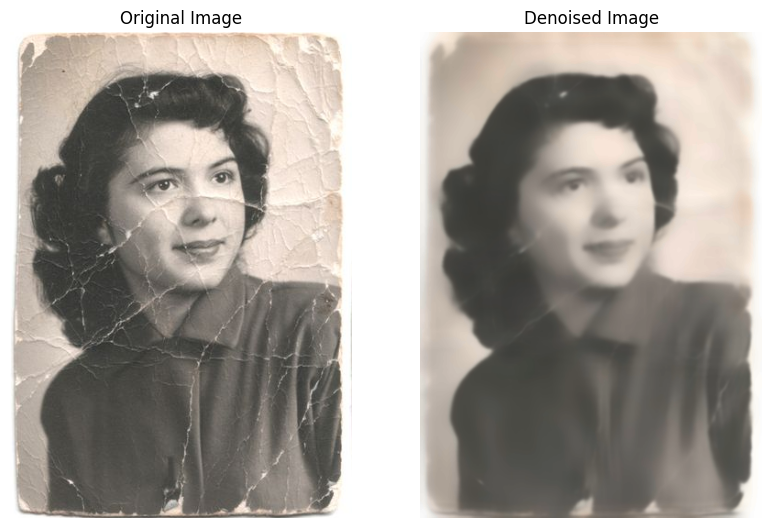

In [123]:
# Step 1: Display the results
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(1, 3, 1)
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the denoised image
plt.subplot(1, 3, 2)
denoised_rgb = cv2.cvtColor(remove_noise(img1), cv2.COLOR_BGR2RGB)
plt.imshow(denoised_rgb)
plt.title('Denoised Image')
plt.axis('off')
plt.show()

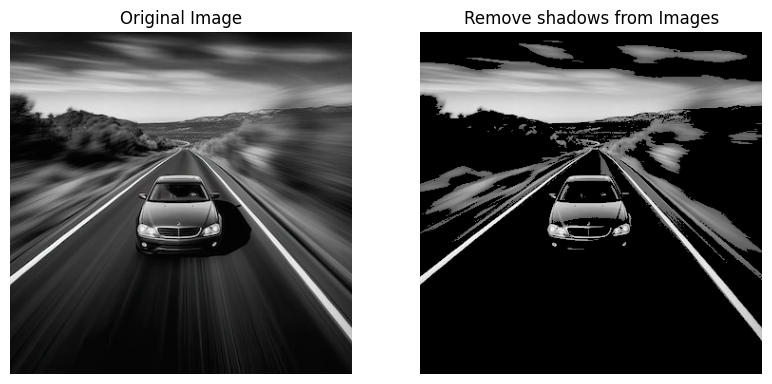

In [128]:
# Step 1: Display the results
plt.figure(figsize=(15, 10))

# Display the original image
plt.subplot(1, 3, 1)
img_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Display the denoised image
plt.subplot(1, 3, 2)
denoised_rgb = cv2.cvtColor(remove_noise(img4), cv2.COLOR_BGR2RGB)
shadow_rgb = cv2.cvtColor(remove_shadows(img4), cv2.COLOR_BGR2RGB)
plt.imshow(shadow_rgb)
plt.title('Remove shadows from Images')
plt.axis('off')
plt.show()